## Final Project Code

> Add blockquote



Investigation into the uses of "maternity" vs/and "paternity" in British parliamentary dialogues.

In [ ]:
from lxml import etree
import lxml

#This is the glob library
import glob

#This is a numerical computation package with many relevant data structures and functions
import numpy as np

#The matplotlib visualization platform
from matplotlib import pyplot as plt
%matplotlib inline

#We can use this to divide the whole dataset in a train/test part
from sklearn.model_selection import train_test_split

#This package implements the Bag-Of-Words model in a very efficient way
from sklearn.feature_extraction.text import CountVectorizer

#This can be used to train a Logistic Regression
from sklearn.linear_model import LogisticRegression

#This function prints the performance of a classifier, given the gold standard values and the predicted values
#In our case today, it will be the name of the politician.
from sklearn.metrics import classification_report

#A set of very simple baselines
from sklearn.dummy import DummyClassifier

#This is a very nice package that shows the progress of a loop, and it is very useful when it takes a while.
from tqdm import tqdm
import re
import spacy

In [ ]:
#Get the dataset
!wget https://www.clarin.si/repository/xmlui/bitstream/handle/11356/1859/ParlaMint-GB.tgz

--2024-08-10 18:21:09--  https://www.clarin.si/repository/xmlui/bitstream/handle/11356/1859/ParlaMint-GB.tgz
Resolving www.clarin.si (www.clarin.si)... 95.87.154.205
Connecting to www.clarin.si (www.clarin.si)|95.87.154.205|:443... connected.
HTTP request sent, awaiting response... 200 200
Length: 540234575 (515M) [application/octet-stream]
Saving to: ‘ParlaMint-GB.tgz’

ParlaMint-GB.tgz    100%[===================>] 515.21M  14.9MB/s    in 37s     

2024-08-10 18:21:47 (13.8 MB/s) - ‘ParlaMint-GB.tgz’ saved [540234575/540234575]



In [ ]:
#Uncompress the dataset
!tar xvzf ParlaMint-GB.tgz

Streaming output truncated to the last 5000 lines.
ParlaMint-GB.txt/2016/ParlaMint-GB_2016-06-29-commons-meta-en.tsv
ParlaMint-GB.txt/2016/ParlaMint-GB_2016-07-12-commons.txt
ParlaMint-GB.txt/2016/ParlaMint-GB_2016-04-19-commons-meta-en.tsv
ParlaMint-GB.txt/2016/ParlaMint-GB_2016-02-25-lords-meta-en.tsv
ParlaMint-GB.txt/2016/ParlaMint-GB_2016-03-07-commons.txt
ParlaMint-GB.txt/2016/ParlaMint-GB_2016-04-27-lords.txt
ParlaMint-GB.txt/2016/ParlaMint-GB_2016-01-20-commons-meta.tsv
ParlaMint-GB.txt/2016/ParlaMint-GB_2016-10-31-commons.txt
ParlaMint-GB.txt/2016/ParlaMint-GB_2016-02-29-commons-meta-en.tsv
ParlaMint-GB.txt/2016/ParlaMint-GB_2016-02-11-lords-meta.tsv
ParlaMint-GB.txt/2016/ParlaMint-GB_2016-03-11-commons-meta-en.tsv
ParlaMint-GB.txt/2016/ParlaMint-GB_2016-10-21-lords-meta.tsv
ParlaMint-GB.txt/2016/ParlaMint-GB_2016-12-02-lords-meta.tsv
ParlaMint-GB.txt/2016/ParlaMint-GB_2016-04-14-lords.txt
ParlaMint-GB.txt/2016/ParlaMint-GB_2016-04-21-lords-meta-en.tsv
ParlaMint-GB.txt/2016/Par

Install SpaCy library to begin manipulating text.

In [ ]:
!pip install -U spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 53.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


import spacy

In [ ]:
import spacy

In [ ]:
# Load the SpaCy English model
nlp = spacy.load("en_core_web_sm")

In [ ]:
#How many documents are there total?
i = 0

for filename in glob.glob("ParlaMint-GB.TEI/*/*.xml"):
    #print("Processing:", filename)
    with open(filename, 'r', encoding='utf-8') as file:
        xml_content = file.read()
        i += 1

print("There are", i, "documents in total.")


There are 2211 documents in total.


How many documents do we have that contain "maternity" and "paternity" - and what are they?

In [ ]:
count = 0
docs_with_mat_and_pat = [] #list of the filenames that contain the keywords "maternity" and "paternity"

for filename in glob.glob("ParlaMint-GB.TEI/*/*.xml"):
    #print("Processing:", filename)
    with open(filename, 'r', encoding='utf-8') as file:
        xml_content = file.read()
    if ("maternity" in xml_content.lower()) or ("paternity" in xml_content.lower()):
      count += 1
      print(count, filename)
      docs_with_mat_and_pat.append(filename)


1 ParlaMint-GB.TEI/2018/ParlaMint-GB_2018-03-21-lords.xml
2 ParlaMint-GB.TEI/2018/ParlaMint-GB_2018-03-07-commons.xml
3 ParlaMint-GB.TEI/2018/ParlaMint-GB_2018-12-12-commons.xml
4 ParlaMint-GB.TEI/2018/ParlaMint-GB_2018-12-17-commons.xml
5 ParlaMint-GB.TEI/2018/ParlaMint-GB_2018-11-29-commons.xml
6 ParlaMint-GB.TEI/2018/ParlaMint-GB_2018-03-26-commons.xml
7 ParlaMint-GB.TEI/2018/ParlaMint-GB_2018-09-12-lords.xml
8 ParlaMint-GB.TEI/2018/ParlaMint-GB_2018-10-26-commons.xml
9 ParlaMint-GB.TEI/2018/ParlaMint-GB_2018-07-03-commons.xml
10 ParlaMint-GB.TEI/2018/ParlaMint-GB_2018-12-04-commons.xml
11 ParlaMint-GB.TEI/2018/ParlaMint-GB_2018-10-18-commons.xml
12 ParlaMint-GB.TEI/2018/ParlaMint-GB_2018-10-29-commons.xml
13 ParlaMint-GB.TEI/2018/ParlaMint-GB_2018-05-09-commons.xml
14 ParlaMint-GB.TEI/2018/ParlaMint-GB_2018-02-22-lords.xml
15 ParlaMint-GB.TEI/2018/ParlaMint-GB_2018-11-13-commons.xml
16 ParlaMint-GB.TEI/2018/ParlaMint-GB_2018-04-27-lords.xml
17 ParlaMint-GB.TEI/2018/ParlaMint-GB_201

In [ ]:
print("There are",count, "documents that contain maternity or paternity")

There are 704 documents that contain maternity or paternity


In [ ]:
#This will collect the sentences with paternity and maternity and perform the SpaCy nlp.

sentences_with_pat_and_mat = []

#texts includes five sentences before and five sentences after, for potential use in topic clustering.
texts_with_pat_and_mat = []

for filename in glob.glob("ParlaMint-GB.TEI/*/*.xml"):
    #print("Processing:", filename)
    with open(filename, 'r', encoding='utf-8') as file:
        xml_content = file.read()
    if ("maternity" in xml_content.lower()) or ("paternity" in xml_content.lower()):

        sentences = re.split("</seg>",xml_content)


        for i, sentence in enumerate (sentences):
            if "maternity" in sentence.lower() or "paternity" in sentence.lower():

                print(i, sentence)
                texts_with_pat_and_mat.append("\n".join(sentences[i-5:i+5]))

                # Process the XML content with SpaCy
                doc = nlp(sentence)
                sentences_with_pat_and_mat.append(doc)

Streaming output truncated to the last 5000 lines.
254 
               <seg xml:id="ParlaMint-GB_2015-06-16-commons.seg255">It is a great honour to make my maiden speech on my 41st birthday. [Hon. Members: “Oh!”] I know—I don’t look it. Birthdays are important occasions in our calendar year. For many of us, Christmas is also an important annual milestone. With that in mind, I would like to talk about my predecessor, otherwise known as the House of Commons Father Christmas. Ed Balls spent a number of years entertaining children as Father Christmas, in stark contrast to his public persona. I always found him personable. We ran positive campaigns and treated each other respectfully. We often discussed our shared love of music. At the election count, he was incredibly gracious. He wished me good luck and said that I would do the job very well. I know it must have been an incredibly difficult evening for him and his family, although it should be noted that, back in February, he called for a

Let's clean up the text a little bit for our analyses. I actually didn't wind up using this in the end. It was in order to help BERTopic process the text, but I ended up discarding my topic cluster data as unhelpful for the present investigation.

In [ ]:
#goes through each item in the list and applies clean_up function to each item

def clean_up(text):
    text = re.sub("<seg.*?>", "", text)
    text = re.sub("<note.*?>.*?</note>", "", text)
    text = re.sub("<u.*?>", "", text)
    text = re.sub("</u>", "", text)
    text = text.strip()
    return text

cleaned_texts = [clean_up(text) for text in texts_with_pat_and_mat]

cleaned_texts[1:5]

['My Lords, the Prime Minister has made clear that tackling injustices such as the gender pay gap is part of building a country that works for everyone. In 2017 the Government introduced ground-breaking regulations requiring large employers to publish the differences between what they pay their male and female staff in average salaries and bonuses. Greater transparency will help to identify barriers to achieving gender equality in the workplace so that employers can take action to address them.\n\n            \n            \n               I welcome the Minister’s reference to greater transparency. Is it not time to be bold on this issue? If we are really going to tackle such inequalities as the gender pay gap, should we not do what is done in some Scandinavian countries and put all income tax returns into the public domain?\n\n            \n            \n               My Lords, certainly Norway has done this. The unintended consequence of doing so was that it was seen as a snooper’s 

Extracting verbs associated with maternity and paternity

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

The following code attempts to avoid the pitfall of assuming "leave" is a verb, when it is in fact part of the noun phrase "maternity/paternity" leave. I'm not convinced it's doing a great job, after inspecting the code manually, but it was much better than my first attempt.

In [ ]:
# Lists to hold verbs associated with "maternity" and "paternity"
maternity_verbs = []
paternity_verbs = []

# Make sure that we save all of the individual sentences that contain "maternity" and "paternity" in a list
sentences_with_pat_and_mat = []

# Iterate over all XML files and process them
for filename in glob.glob("ParlaMint-GB.TEI/*/*.xml"):
    #print("Processing:", filename)
    with open(filename, 'r', encoding='utf-8') as file:
        xml_content = file.read()
    if ("maternity" in xml_content.lower()) or ("paternity" in xml_content.lower()):

        sentences = re.split("</seg>",xml_content)

        for sentence in sentences:
            if "maternity" in sentence.lower() or "paternity" in sentence.lower():
                #print(sentence)

                # Process the XML content with SpaCy
                doc = nlp(sentence)
                sentences_with_pat_and_mat.append(doc)

                # Extract verbs associated with "maternity" and "paternity"
                for token in doc:
                    # Check for "maternity" and its associated verbs
                    if token.text.lower() == "maternity":
                        # Find the verb in the sentence
                        for ancestor in token.ancestors:
                            if ancestor.pos_ == "VERB":
                                maternity_verbs.append(ancestor.text)
                                break  # Stop after finding the first main verb

                    # Check for "paternity" and its associated verbs
                    elif token.text.lower() == "paternity":
                        # Find the verb in the sentence
                        for ancestor in token.ancestors:
                            if ancestor.pos_ == "VERB":
                                paternity_verbs.append(ancestor.text)
                                break  # Stop after finding the first main verb
# Count the verbs for each category
maternity_verb_count = len(maternity_verbs)
paternity_verb_count = len(paternity_verbs)

# Print the results
print("Verbs associated with maternity:", maternity_verbs)
print("Verbs associated with paternity:", paternity_verbs)

Verbs associated with maternity: ['change', 'eradicated', 'update', 'supported', 'following', 'enjoying', 'denied', 'denied', 'published', 'encouraging', 'rolled', 'shut', 'go', 'leave', 'running', 'extending', 'threatened', 'suffer', 'start', 'is', 'returning', 'believes', 'is', 'make', 'pair', 'says', 'provide', 'say', 'get', 'leave', 'specialising', 'spoke', 'lecture', 'breaking', 'downgraded', 'took', 'take', 'enjoy', 'leave', 'take', 'is', 'talking', 'leave', 'mentioning', 'have', 'going', 'have', 'think', 'think', 'take', 'take', 'take', 'have', 'took', 'leave', 'replaced', 'scrutinise', 'finished', 'going', 'affect', 'took', 'giving', 'sent', 'bring', 'tackling', 'qualify', 'tackle', 'happening', 'suggest', 'promoted', 'is', 'lose', 'accommodate', 'leave', 'bringing', 'taken', 'entitled', 'afforded', 'suggested', 'given', 'need', 'works', 'happened', 'leave', 'specialised', 'raised', 'expressing', 'have', 'paired', 'paired', 'explain', 'receive', 'receive', 'won', 'erode', 'send

In [ ]:
print(maternity_verb_count)
print(paternity_verb_count)


2953
370


Top 20 Verbs Associated with 'Maternity' and Their Frequencies:
take: 115
leave: 110
have: 91
including: 51
improve: 48
make: 34
made: 32
has: 32
provide: 29
improving: 29
is: 27
had: 26
taken: 25
get: 24
include: 23
taking: 23
paid: 22
ensure: 22
need: 20
extend: 19

----------------------------------------

Top 20 Verbs Associated with 'Paternity' and Their Frequencies:
leave: 106
including: 11
take: 10
taking: 8
include: 8
have: 7
given: 7
paid: 6
relating: 5
taken: 4
need: 4
is: 4
cover: 4
extend: 4
spend: 4
extending: 3
went: 3
extended: 3
has: 3
entitled: 3


<ipython-input-9-adf4a6f13bc2>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=maternity_counts_list, y=maternity_verbs_list, palette='viridis')
<ipython-input-9-adf4a6f13bc2>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=paternity_counts_list, y=paternity_verbs_list, palette='viridis')


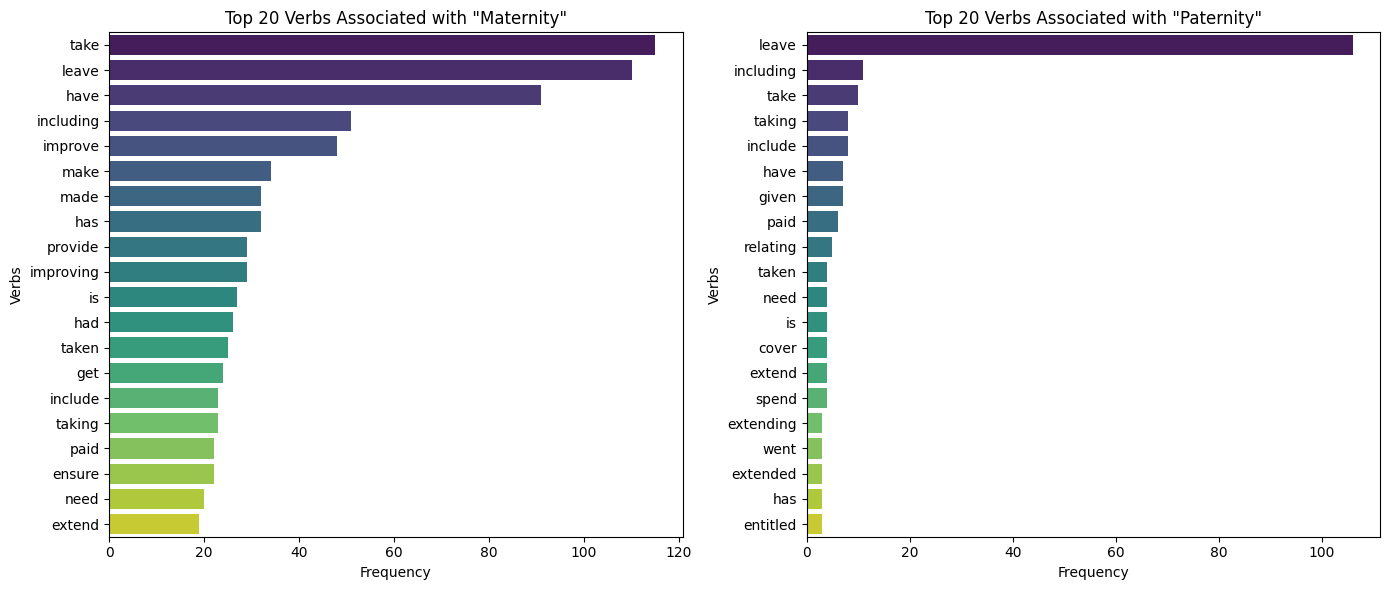

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Count frequency of each verb
maternity_verb_counts = Counter(maternity_verbs)
paternity_verb_counts = Counter(paternity_verbs)

# Extract the top 20 verbs for "maternity"
top_maternity_verbs = maternity_verb_counts.most_common(20)

# Extract the top 20 verbs for "paternity"
top_paternity_verbs = paternity_verb_counts.most_common(20)

maternity_verbs_list, maternity_counts_list = zip(*top_maternity_verbs) if top_maternity_verbs else ([], [])
paternity_verbs_list, paternity_counts_list = zip(*top_paternity_verbs) if top_paternity_verbs else ([], [])

# Print the top 20 verbs associated with "maternity"
print("Top 20 Verbs Associated with 'Maternity' and Their Frequencies:")
for verb, count in top_maternity_verbs:
    print(f"{verb}: {count}")

print("\n" + "-" * 40 + "\n")

# Print the top 20 verbs associated with "paternity"
print("Top 20 Verbs Associated with 'Paternity' and Their Frequencies:")
for verb, count in top_paternity_verbs:
    print(f"{verb}: {count}")

# Set up the matplotlib figure
plt.figure(figsize=(14, 6))

# Create a bar plot for top 20 maternity verbs
plt.subplot(1, 2, 1)
sns.barplot(x=maternity_counts_list, y=maternity_verbs_list, palette='viridis')
plt.xlabel('Frequency')
plt.ylabel('Verbs')
plt.title('Top 20 Verbs Associated with "Maternity"')

# Create a bar plot for top 20 paternity verbs
plt.subplot(1, 2, 2)
sns.barplot(x=paternity_counts_list, y=paternity_verbs_list, palette='viridis')
plt.xlabel('Frequency')
plt.ylabel('Verbs')
plt.title('Top 20 Verbs Associated with "Paternity"')

# Show the plot
plt.tight_layout()
plt.show()

Extract adjectival collocations.

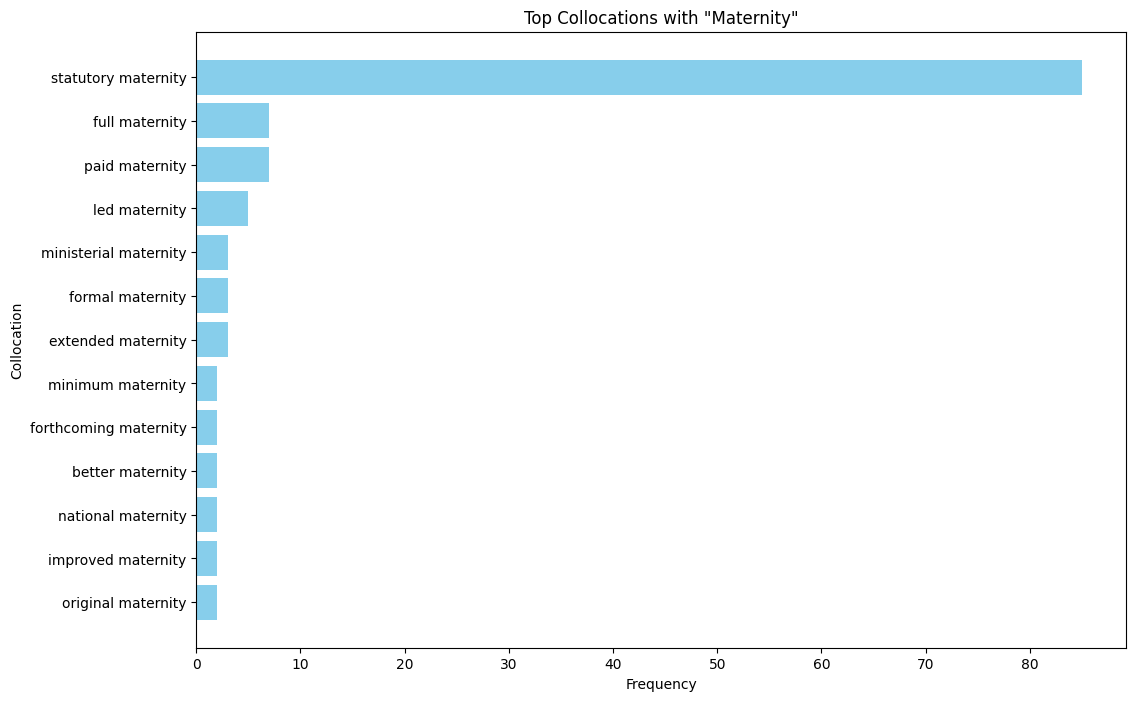

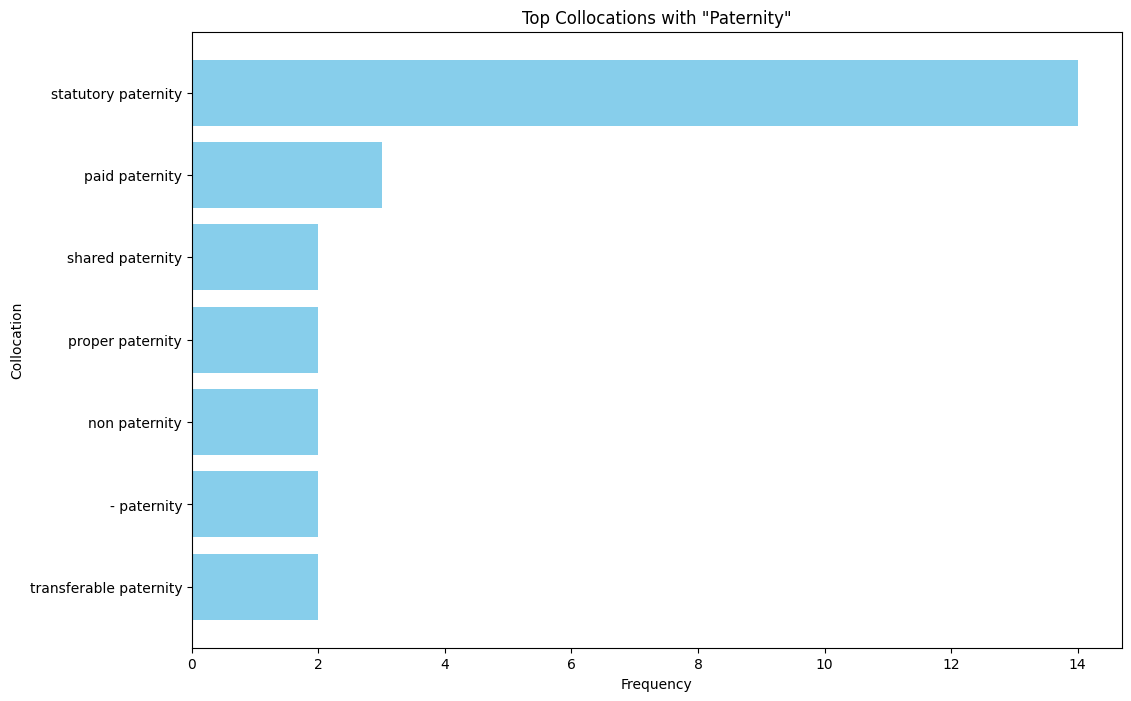

Maternity Collocations:  Counter({'statutory maternity': 85, 'full maternity': 7, 'paid maternity': 7, 'led maternity': 5, 'ministerial maternity': 3, 'formal maternity': 3, 'extended maternity': 3, 'minimum maternity': 2, 'forthcoming maternity': 2, 'better maternity': 2, 'national maternity': 2, 'improved maternity': 2, 'original maternity': 2, 'specific maternity': 1, 'modern maternity': 1, 'busy maternity': 1, 'enhanced maternity': 1, 'paediatric maternity': 1, 'black maternity': 1, 'ordinary maternity': 1, 'additional maternity': 1, 'formalised maternity': 1, 'own maternity': 1, 'poorest maternity': 1, 'poor maternity': 1, 'happy maternity': 1, 'low maternity': 1, 'extraordinary maternity': 1, 'existing maternity': 1, 'stronger maternity': 1, 'great maternity': 1, 'new maternity': 1, 'fairer maternity': 1, 'consistent maternity': 1, 'more maternity': 1, 'increased maternity': 1, 'longer maternity': 1, 'individual maternity': 1, 'appropriate maternity': 1, 'multi maternity': 1, '- 

In [ ]:
def extract_collocations(sentences):
    maternity_collocations = Counter()
    paternity_collocations = Counter()

    for sentence in sentences:
        for token in sentence:
            if token.dep_ == "amod" and token.head.pos_ == "NOUN":
                # Convert both token and head to lowercase
                collocation = (token.text.lower() + " " + token.head.text.lower())
                if token.head.text.lower() == "maternity":
                    maternity_collocations[collocation] += 1
                elif token.head.text.lower() == "paternity":
                    paternity_collocations[collocation] += 1

    return maternity_collocations, paternity_collocations

# Assume `sentences_with_pat_and_mat` is a list of spaCy Doc objects
maternity_collocations, paternity_collocations = extract_collocations(sentences_with_pat_and_mat)

# Plotting function with options for customization
def plot_collocations(collocations, title, min_frequency=2):
    # Filter collocations by minimum frequency
    filtered_collocations = {collocation: count for collocation, count in collocations.items() if count > min_frequency}

    # Sort collocations by frequency and take the top N
    most_common_collocations = sorted(filtered_collocations.items(), key=lambda x: x[1], reverse=True)
    collocation_phrases = [item[0] for item in most_common_collocations]
    frequencies = [item[1] for item in most_common_collocations]

    if len(collocation_phrases) == 0:
        print(f"No collocations with a frequency greater than {min_frequency} for {title}")
        return

    # Plotting
    plt.figure(figsize=(12, 8))  # Increase figure size
    plt.barh(collocation_phrases, frequencies, color='skyblue')
    plt.xlabel('Frequency')
    plt.ylabel('Collocation')
    plt.title(title)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.gca().invert_yaxis()  # Invert y-axis to display the highest frequency on top
    plt.show()

# Plot the collocations for maternity and paternity with a minimum frequency threshold
plot_collocations(maternity_collocations, 'Top Collocations with "Maternity"', min_frequency=1)
plot_collocations(paternity_collocations, 'Top Collocations with "Paternity"', min_frequency=1)

print("Maternity Collocations: ", maternity_collocations)
print("Paternity Collocations: ", paternity_collocations)

In [ ]:
def extract_collocations(sentences):
    maternity_collocations = []
    paternity_collocations = []

    for sentence in sentences:
        for token in sentence:
            if token.dep_ == "amod" and token.head.pos_ == "NOUN":
                # Convert both token and head to lowercase
                collocation = (token.text.lower() + " " + token.head.text.lower())
                if token.head.text.lower() == "maternity":
                    maternity_collocations.append(collocation)
                elif token.head.text.lower() == "paternity":
                    paternity_collocations.append(collocation)

    return maternity_collocations, paternity_collocations

# Assume `sentences_with_pat_and_mat` is a list of spaCy Doc objects
maternity_collocations, paternity_collocations = extract_collocations(sentences_with_pat_and_mat)


In [ ]:
print(maternity_collocations)
print(paternity_collocations)

['ministerial maternity', 'ministerial maternity', 'formal maternity', 'statutory maternity', 'statutory maternity', 'busy maternity', 'statutory maternity', 'statutory maternity', 'enhanced maternity', 'statutory maternity', 'statutory maternity', 'full maternity', 'specific maternity', 'modern maternity', 'statutory maternity', 'statutory maternity', 'statutory maternity', 'statutory maternity', 'better maternity', 'extraordinary maternity', 'statutory maternity', 'statutory maternity', 'statutory maternity', 'statutory maternity', 'statutory maternity', 'statutory maternity', 'consistent maternity', 'minimum maternity', 'more maternity', 'statutory maternity', 'statutory maternity', 'statutory maternity', 'statutory maternity', 'fairer maternity', 'statutory maternity', 'new maternity', 'statutory maternity', 'statutory maternity', 'led maternity', 'increased maternity', 'statutory maternity', 'statutory maternity', 'statutory maternity', 'led maternity', 'statutory maternity', 'sta

upload file

In [ ]:
from google.colab import files

uploaded = files.upload()

In [ ]:
import pandas as pd

df = pd.read_excel('verbs_and_collocations_updated.xlsx', sheet_name='Sheet1')

# Convert columns to lists
pragmatic_verbs = df['PRAGMATIC_VERBS'].dropna().tolist()
nurturing_verbs = df['NURTURING_VERBS'].dropna().tolist()
nurturing_collocations = df['NURTURING_COLLOCATIONS'].dropna().tolist()
pragmatic_collocations = df['PRAGMATIC_COLLOCATIONS'].dropna().tolist()
maternity_collocations_cleaned = df['COLLOCATIONS_MATERNITY'].dropna().tolist()
paternity_collocations_cleaned = df['COLLOCATIONS_PATERNITY'].dropna().tolist()

In [ ]:
print(pragmatic_verbs)
print(nurturing_verbs)

['leave', 'lose', 'increase', 'oppose', 'work', 'provides', 'losing', 'preventing', 'forced', 'tackling', 'leaving', 'claims', 'paying', 'withheld', 'entitled', 'attended', 'involve', 'train', 'funded', 'working', 'established', 'launched', 'provide', 'contribute', 'downgrading', 'pay', 'worked', 'tackle', 'increased', 'support', 'need', 'applied', 'impact', 'claim', 'deducting', 'providing', 'provided', 'prohibited', 'Owing', 'pursuing', 'afforded', 'trained', 'deliver', 'benefitting', 'developing', 'require', 'implemented', 'remain', 'excluded', 'refer', 'penalise', 'loses', 'costs', 'build', 'inspect', 'assessed', 'paid', 'doubled', 'cut', 'criticised', 'compared', 'conducts', 'investigate', 'fund', 'spend', 'adopted', 'implement', 'regulate', 'represented', 'discuss', 'prevent', 'consulted', 'reports', 'legislate', 'notifies', 'conducted', 'offer', 'expressing', 'denied', 'submitted', 'upholds', 'calculating', 'appointed', 'remains', 'granted', 'accorded', 'allow', 'benefit', 'expl

In [ ]:
print(nurturing_collocations)
print(pragmatic_collocations)

['happy ', 'great ']
['ministerial ', 'formal ', 'statutory ', 'consistent ', 'minimum ', 'increased ', 'extended ', 'disciplinary ', 'additional ', 'formalised ', 'paid ', 'poorest ', 'poor ', 'paediatric ', 'national ', 'average ', 'unlawful ', 'proper ', 'transferable ', 'partial ']


Here, we find out how many of the verbs and collocations are nurturing vs. non-nurturing.

In [ ]:
# Define a custom lexicon for categorization for verbs
nurturing_lexicon = {
    'nurturing': nurturing_verbs,
    'pragmatic': pragmatic_verbs
}

# Function to categorize and count words
def categorize_and_count_words(word_list, lexicon):
    categorized = {'nurturing': 0, 'pragmatic': 0}

    for word in word_list:
        if word in lexicon['nurturing']:
            categorized['nurturing'] += 1
        elif word in lexicon['pragmatic']:
            categorized['pragmatic'] += 1

    return categorized

# Categorize and count the words
maternity_categories = categorize_and_count_words(maternity_verbs, nurturing_lexicon)
paternity_categories = categorize_and_count_words(paternity_verbs, nurturing_lexicon)

# Calculate percentages
def calculate_percentage(categories, total):
    return {category: (count / total) * 100 for category, count in categories.items()}

maternity_total = len(maternity_verbs)
paternity_total = len(paternity_verbs)

maternity_percentages = calculate_percentage(maternity_categories, maternity_total)
paternity_percentages = calculate_percentage(paternity_categories, paternity_total)

# Print results
print("Maternity Counts:", maternity_categories)
print("Paternity Counts:", paternity_categories)

print("\nMaternity Percentages:", maternity_percentages)
print("Paternity Percentages:", paternity_percentages)


Maternity Counts: {'nurturing': 309, 'pragmatic': 611}
Paternity Counts: {'nurturing': 39, 'pragmatic': 153}

Maternity Percentages: {'nurturing': 10.463934981374873, 'pragmatic': 20.690822891974264}
Paternity Percentages: {'nurturing': 10.54054054054054, 'pragmatic': 41.351351351351354}


In [ ]:
# Define a custom lexicon for categorization for collocations
nurturing_lexicon = {
    'nurturing': nurturing_collocations,
    'pragmatic': pragmatic_collocations
}

# Function to categorize and count words
def categorize_and_count_words(word_list, lexicon):
    categorized = {'nurturing': 0, 'pragmatic': 0}

    for word in word_list:
        if word in lexicon['nurturing']:
            categorized['nurturing'] += 1
        elif word in lexicon['pragmatic']:
            categorized['pragmatic'] += 1

    return categorized

# Categorize and count the words
maternity_categories = categorize_and_count_words(maternity_collocations_cleaned, nurturing_lexicon)
paternity_categories = categorize_and_count_words(paternity_collocations_cleaned, nurturing_lexicon)

# Calculate percentages
def calculate_percentage(categories, total):
    return {category: (count / total) * 100 for category, count in categories.items()}

maternity_total = len(maternity_collocations)
paternity_total = len(paternity_collocations)

maternity_percentages = calculate_percentage(maternity_categories, maternity_total)
paternity_percentages = calculate_percentage(paternity_categories, paternity_total)

# Print results
print("Maternity Counts:", maternity_categories)
print("Paternity Counts:", paternity_categories)

print("\nMaternity Percentages:", maternity_percentages)
print("Paternity Percentages:", paternity_percentages)

print(len(maternity_collocations))
print(len(paternity_collocations))



Maternity Counts: {'nurturing': 2, 'pragmatic': 115}
Paternity Counts: {'nurturing': 0, 'pragmatic': 23}

Maternity Percentages: {'nurturing': 1.257861635220126, 'pragmatic': 72.32704402515722}
Paternity Percentages: {'nurturing': 0.0, 'pragmatic': 63.888888888888886}
159
36


In [ ]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

# Counts Verbs
maternity_caregiving = 309
maternity_total = 920
paternity_caregiving = 39
paternity_total = 192

# Arrays of successes and trials
successes = np.array([maternity_caregiving, paternity_caregiving])
nobs = np.array([maternity_total, paternity_total])

# Perform the z-test
z_stat, p_value = proportions_ztest(successes, nobs, alternative='larger')

print(f"Z-statistic nururing verbs: {z_stat:.4f}")
print(f"P-value nurturing verbs: {p_value:.4f}")

# Counts Verbs
maternity_pragmatic = 611
maternity_total = 920
paternity_pragmatic = 153
paternity_total = 192

# Arrays of successes and trials
successes = np.array([paternity_pragmatic, maternity_pragmatic])
nobs = np.array([paternity_total, maternity_total])

# Perform the z-test
z_stat, p_value = proportions_ztest(successes, nobs, alternative='larger')

print(f"Z-statistic pragmatic verbs: {z_stat:.4f}")
print(f"P-value pragmatic verbs: {p_value:.4f}")



Z-statistic nururing verbs: 3.6081
P-value nurturing verbs: 0.0002
Z-statistic pragmatic verbs: 3.6081
P-value pragmatic verbs: 0.0002


In [ ]:
# Counts Collocations
maternity_caregiving = 2
maternity_total = 159
paternity_caregiving = 0
paternity_total = 36

# Arrays of successes and trials
successes = np.array([maternity_caregiving, paternity_caregiving])
nobs = np.array([maternity_total, paternity_total])

# Perform the z-test
z_stat, p_value = proportions_ztest(successes, nobs, alternative='larger')

print(f"Z-statistic nurturing collocations: {z_stat:.4f}")
print(f"P-value nurturing collocations: {p_value:.4f}")

# Counts Collocations
maternity_pragmatic = 115
maternity_total = 159
paternity_pragmatic = 23
paternity_total = 36

# Arrays of successes and trials
successes = np.array([maternity_caregiving, paternity_caregiving])
nobs = np.array([maternity_total, paternity_total])

# Perform the z-test
z_stat, p_value = proportions_ztest(successes, nobs, alternative='larger')

print(f"Z-statistic pragmatic collocations: {z_stat:.4f}")
print(f"P-value pragmatic collocations: {p_value:.4f}")

Z-statistic: 0.6764
P-value: 0.2494


Using BERTopic to cluster - this didn't wind up being very helpful for me, and the learning curve to interpret the data I did get was very steep. So I wound up not using it. But I'll leave it here as evidence that I tried :)

In [ ]:
#BERTopic clustering
!pip install bertopic
from bertopic import BERTopic

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

Calculating mutual information scores to see if there is statistical significance.


In [ ]:
docs = maternity_verbs

# Create BERTopic model
topic_model = BERTopic(embedding_model=nlp)
topics, probs = topic_model.fit_transform(docs)

# Visualize the topics
fig = topic_model.visualize_topics()
fig.show()

#This is really unhelpful, even after cleaning. I wonder why? I need to better understand what BERTopic is doing I guess.

Below this line is code I'm not currently using, but didn't want to delete yet.


In [ ]:

for filename in glob.glob("ParlaMint-GB.TEI/*/*.xml"):
  print (filename)


ParlaMint-GB.TEI/2017/ParlaMint-GB_2017-01-19-lords.xml
ParlaMint-GB.TEI/2017/ParlaMint-GB_2017-11-01-commons.xml
ParlaMint-GB.TEI/2017/ParlaMint-GB_2017-02-01-lords.xml
ParlaMint-GB.TEI/2017/ParlaMint-GB_2017-04-05-lords.xml
ParlaMint-GB.TEI/2017/ParlaMint-GB_2017-10-18-lords.xml
ParlaMint-GB.TEI/2017/ParlaMint-GB_2017-03-13-commons.xml
ParlaMint-GB.TEI/2017/ParlaMint-GB_2017-03-15-commons.xml
ParlaMint-GB.TEI/2017/ParlaMint-GB_2017-10-25-lords.xml
ParlaMint-GB.TEI/2017/ParlaMint-GB_2017-09-05-lords.xml
ParlaMint-GB.TEI/2017/ParlaMint-GB_2017-10-24-commons.xml
ParlaMint-GB.TEI/2017/ParlaMint-GB_2017-10-18-commons.xml
ParlaMint-GB.TEI/2017/ParlaMint-GB_2017-03-07-lords.xml
ParlaMint-GB.TEI/2017/ParlaMint-GB_2017-11-29-commons.xml
ParlaMint-GB.TEI/2017/ParlaMint-GB_2017-09-12-commons.xml
ParlaMint-GB.TEI/2017/ParlaMint-GB_2017-02-08-commons.xml
ParlaMint-GB.TEI/2017/ParlaMint-GB_2017-03-14-lords.xml
ParlaMint-GB.TEI/2017/ParlaMint-GB_2017-06-22-lords.xml
ParlaMint-GB.TEI/2017/ParlaMint-

In [ ]:
with open("/content/ParlaMint-GB.TEI/2020/ParlaMint-GB_2020-02-12-lords.xml", 'r', encoding='utf-8') as file:
        xml_content = file.read()
        print(xml_content)

<?xml version="1.0" encoding="UTF-8"?>
<TEI xmlns="http://www.tei-c.org/ns/1.0" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xml:id="ParlaMint-GB_2020-02-12-lords" xml:lang="en" ana="#parla.sitting #covid">
   <teiHeader>
      <fileDesc>
         <titleStmt>
            <title type="main">Great Britain parliamentary corpus ParlaMint-GB, Lords, 2020-02-12 [ParlaMint]</title>
            <title type="sub">Minutes of the House of Lords, Daily Session 2020-02-12</title>
            <meeting corresp="#parliament.HL" ana="#parla.upper #parla.meeting.regular"/>
            <meeting n="58" corresp="#parliament.HL" ana="#parla.upper #parla.term #PoGB.58"/>
            <meeting n="2020-02-12" corresp="#parliament.HL" ana="#parla.upper #parla.sitting"/>
            <respStmt>
               <persName>Matthew Coole</persName>
               <resp>TEI corpus encoding</resp>
            </respStmt>
         </titleStmt>
         <editionStmt>
            <edition>4.0</edition>
         </e

In [ ]:
import re

sentences = re.split("</seg>",xml_content)

for sentence in sentences:
  if "maternity" in sentence.lower() or "paternity" in sentence.lower():
    print(sentence)


               <seg xml:id="ParlaMint-GB_2020-02-12-lords.seg140">The amendment refers to the Equality Act 2010 and the nine protected characteristics: age; disability; gender reassignment; marriage and civil partnership; pregnancy and maternity; race, religion or belief; sex; and sexual orientation. At Second Reading the Government said that stop and search demographics would be available for those subject to a stop and search under these powers, and that “they will be published by the Home Office in the usual way.”—[Official Report, 27/1/20; col. 1295.] What does “published by the Home Office in the usual way” mean in relation to this amendment and the nine protected characteristics under the Equality Act 2010


In [ ]:
from google.colab import files

uploaded = files.upload()

Saving digitial_hum_project.xlsx to digitial_hum_project.xlsx


In [ ]:
import pandas as pd

df = pd.read_excel('digitial_hum_project.xlsx', sheet_name='Verbs ')

# Convert DataFrame to LaTeX table
latex_table = df.to_latex(index=False)

# Save the LaTeX table to a .tex file
with open('verbs.tex', 'w') as f:
    f.write(latex_table)

In [ ]:
from google.colab import files

# Download the 'table.tex' file
files.download('verbs.tex')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>